# Introduction

I remember reading about an article in Times last month. It mentioned how the number of road accidents in India touched all time high in 2019. The article can be found here: https://timesofindia.indiatimes.com/india/over-1-51-lakh-died-in-road-accidents-last-year-up-tops-among-states/articleshow/72078508.cms

![Acc](https://bsmedia.business-standard.com/_media/bs/img/article/2014-12/18/full/1418893966-5053.jpg)

Img Source: https://bsmedia.business-standard.com/_media/bs/img/article/2014-12/18/full/1418893966-5053.jpg

And this intrigued me. I wanted to explore the data, to see if there are causes which I can match up to the numbers of injuries or deaths reported. https://data.gov.in/ has some data available.  

In this kernel, I will be analyzing the data on road accidents from 2014-2017. I also found some supporting road accident data i.e. weather conditions for the accidents and the road conditions. There are some oher supporting data available which you can use to understand this better. 


India has the highest number of road fatalities in the world. In 2016, the latest year for which global figures are available, India accounted for more than a third of global road accident deaths. The World Health Organization says such deaths are under-reported and estimated that in 2019, the figure for India was likely twice as big as that reported by the government. 

See: https://economictimes.indiatimes.com/industry/transportation/roadways/indian-roads-fatalities-in-mishaps-high-despite-better-construction-and-use-of-tech/articleshow/68443824.cms?from=mdr

The paper titles **Road Traffic Accidents in India: Issues and Challenges** by Sanjay Kumar Singh* Professor of Economics at the Indian Institute of Management Lucknow, India has some very interesting insights states the below 

> Fatalities and injuries resulting from road traffic accidents are a major and growing public health problem in India.
> Every week nearly 2,650 people get killed and 9,000 get injured due to traffic accidents. In 2013, latest year for which
> data is available, 137,423 people died and 469,900 people got injured due to road accidents in India. Traffic accidents have now earned India a dubious distinction; with nearly 140,000 deaths annually, the country has overtaken China to
> top the world in road fatalities. India is the only country in the world which faces more than 15 fatalities and 53 injuries
> every hour as a consequence of road crashes. While in many developed and developing countries including China, the
> situation is generally improving, India faces a worsening situation. If the trend continues, the total number of road
> traffic deaths in India would increase by 100% between 2013 and 2027.
> 
Paper: https://reader.elsevier.com/reader/sd/pii/S2352146517307913?token=4ADB32DF3CEE92D8574B34132B92AB053E9FF54072488412F0EDF74F8C2D58C26454142A35C0019B572A0E79AB021BC6


The paper uses tthes Accidental Deaths & Suicides in India, 1970 to 2013 published by the National Crime Records Bureau, Ministry of Home Affairs, Government of India, New Delhi data for its study. 

Since we have the no. of deaths and injuries, let us look at them first.

# Importing Relevant Libraries

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import csv

# Importing Data from csv file
    
    
    



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
dataset = pd.read_csv('highway.csv')

# Loading the total peope killed dataset to pandas Dataframe

In [17]:
#To visualize five rows in dataset
dataset.head()

,STATE,2016,2017,2018,2019
0,Andhra pradesh,3006,2898,2929,3114
1,Arunachal pradesh,58,41,56,54
2,ASSAM,1295,1464,1541,1690
3,BIHAR,1296,1152,1384,1421
4,GOA,113,118,104,107


In [16]:
#To visualize bottom five rows in dataset
dataset.tail()

,STATE,2016,2017,2018,2019
30,DADRA AND NAGAR HAVELI,0,0,0,0
31,DAMAN AND DIU,0,5,0,0
32,DELHI,238,267,263,278
33,LAKSHDWEEP,0,0,0,0
34,PUDUCHERRY,131,137,111,82


In [19]:
dataset.shape

(35, 5)

In [20]:
dataset.describe

<bound method NDFrame.describe of                      STATE  2016  2017  2018  2019
0           Andhra pradesh  3006  2898  2929  3114
1        Arunachal pradesh    58    41    56    54
2                    ASSAM  1295  1464  1541  1690
3                    BIHAR  1296  1152  1384  1421
4                      GOA   113   118   104   107
5                  GUJARAT  2141  2145  2171  1898
6                  HARYANA  1845  1990  2088  1901
7         HIMACHAL PRADESH   478   528   470   487
8            JAMMU KASHMIR   403   409   400   384
9                JHARKHAND  1222  1250  1122  1554
10               KARNATAKA  4116  3792  3986  3842
11                  KERALA  1263  1309  1248  1259
12          MADHYA PRADESH  2564  2521  2601  2904
13             MAHARASHTRA  3887  3637  4088  3799
14                 MANIPUR    46    97    88   111
15               MEGHALAYA   108   111    73    89
16                 MIZORAM    45    29    15    19
17                NAGALAND    35    27    12    

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STATE   35 non-null     object
 1   2016    35 non-null     int64 
 2   2017    35 non-null     int64 
 3   2018    35 non-null     int64 
 4   2019    35 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


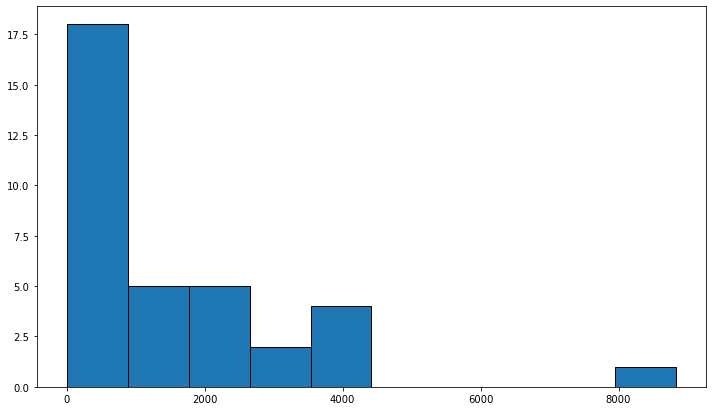

In [27]:
#histplot of 2019
plt.figure(figsize =(12,7))
plt.hist("2019",data = dataset,edgecolor ="k")
plt.show()

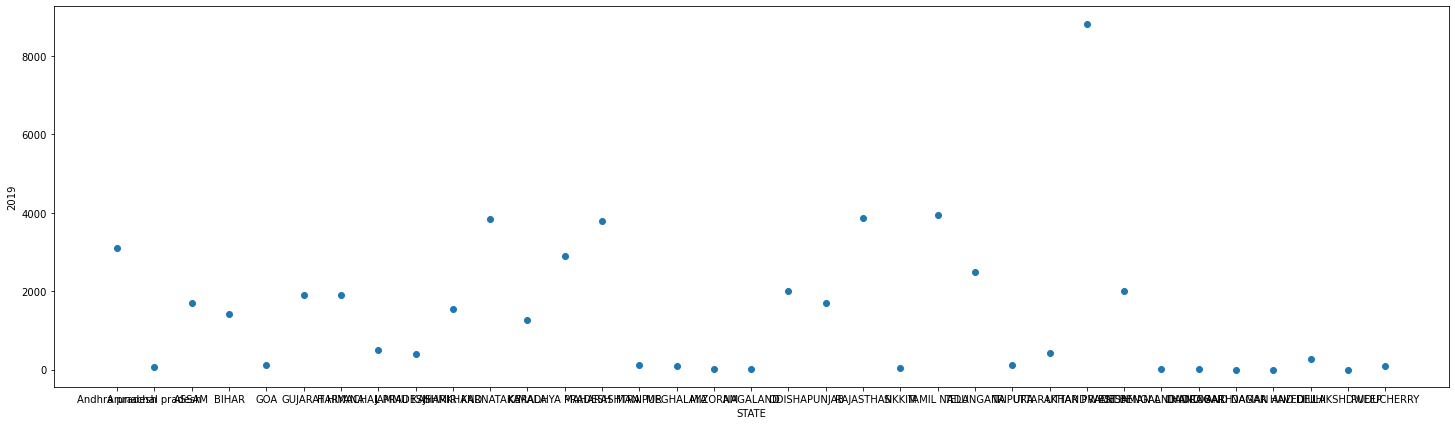

In [36]:
plt.figure(figsize =(25,7))
plt.scatter("STATE","2019",data = dataset)
plt.xlabel("STATE")
plt.ylabel("2019")
plt.show()

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [44]:
x = dataset["STATE"]
y = dataset["2019"]

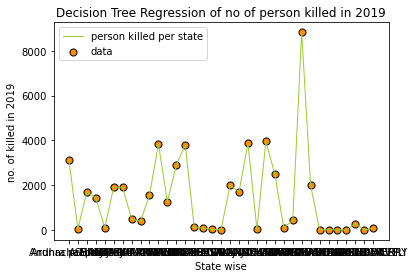

In [52]:
regr_1 = DecisionTreeRegressor(max_depth=100)

# Plot the results
plt.figure()
plt.scatter(x,y, s=50, edgecolor="black",
            c="darkorange", label="data")

plt.plot(x, y,color="yellowgreen", label="person killed per state", linewidth=1)
plt.xlabel("State wise")
plt.ylabel("no. of killed in 2019",)
plt.title("Decision Tree Regression of no of person killed in 2019")
plt.legend()
plt.show()

In [63]:
dataset_1 = pd.read_csv('classification.csv')

In [69]:
dataset_1

,STATE,Accident on BRIDGE,TOTAL KILLED ON BRIDGE,Accident on CULVERT,TOTAL KILLED IN CULVERT,Accident by POT HOLES,TOTAL KILLED BY POT HOLES,Accident by STEEP GRADE,TOTAL KILLED BY STEEP GRADE,Accident by ONGOING ROAD WORK,TOTAL KILLED DURING CONSTRUCTION
0,Andhra pradesh,716,268,291,121,9512,32,48,15,285,96
1,Arunachal pradesh,36,15,27,13,322,6,20,13,30,19
2,ASSAM,705,229,454,119,0,93,189,63,392,123
3,BIHAR,261,178,311,206,77,0,142,102,18,16
4,CHATTISGARH,357,158,292,143,5,28,88,24,233,84
5,GOA,15,1,13,0,5,1,0,0,0,0
6,GUJARAT,546,270,273,135,61,5,204,117,206,102
7,HARYANA,408,216,296,150,21,20,161,88,300,151
8,HIMACHAL PRADESH,38,20,0,0,1,16,114,54,42,19
9,JAMMU KASHMIR,28,5,17,5,120,0,33,9,52,17


In [70]:
dataset_1.columns

Index(['STATE', 'Accident on BRIDGE', 'TOTAL KILLED ON BRIDGE',
       'Accident on CULVERT', 'TOTAL KILLED IN CULVERT',
       'Accident by POT HOLES', 'TOTAL KILLED BY POT HOLES',
       'Accident by STEEP GRADE', 'TOTAL KILLED BY STEEP GRADE',
       'Accident by ONGOING ROAD WORK', 'TOTAL KILLED DURING CONSTRUCTION'],
      dtype='object')

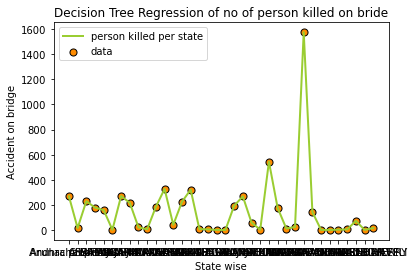

In [73]:
x = dataset["STATE"]
y = dataset["TOTAL KILLED ON BRIDGE"]
regr_1 = DecisionTreeRegressor(max_depth=200)

# Plot the results
plt.figure()
plt.scatter(x,y, s=50, edgecolor="black",
            c="darkorange", label="data")

plt.plot(x, y,color="yellowgreen", label="person killed per state", linewidth=2)
plt.xlabel("State wise")
plt.ylabel("Accident on bridge",)
plt.title("Decision Tree Regression of no of person killed on bride")
plt.legend()
plt.show()

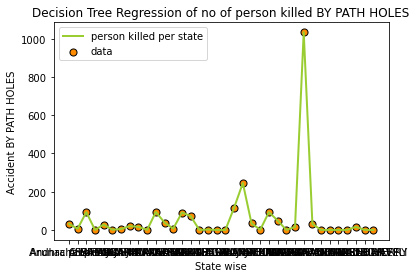

In [75]:
x = dataset["STATE"]
y = dataset['TOTAL KILLED BY POT HOLES']
regr_1 = DecisionTreeRegressor(max_depth=100)

# Plot the results
plt.figure()
plt.scatter(x,y, s=50, edgecolor="black",
            c="darkorange", label="data")

plt.plot(x, y,color="yellowgreen", label="person killed per state", linewidth=2)
plt.xlabel("State wise")
plt.ylabel("Accident BY PATH HOLES",)
plt.title("Decision Tree Regression of no of person killed BY PATH HOLES")
plt.legend()
plt.show()

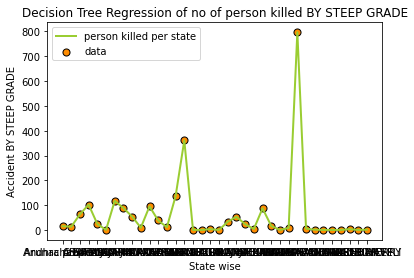

In [77]:
x = dataset["STATE"]
y = dataset['TOTAL KILLED BY STEEP GRADE']
regr_1 = DecisionTreeRegressor(max_depth=100)

# Plot the results
plt.figure()
plt.scatter(x,y, s=50, edgecolor="black",
            c="darkorange", label="data")

plt.plot(x, y,color="yellowgreen", label="person killed per state", linewidth=2)
plt.xlabel("State wise")
plt.ylabel("Accident BY STEEP GRADE",)
plt.title("Decision Tree Regression of no of person killed BY STEEP GRADE")
plt.legend()
plt.show()

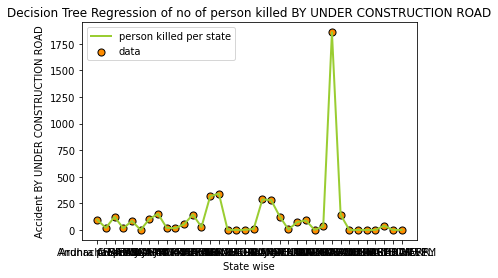

In [84]:
x = dataset["STATE"]
y = dataset['TOTAL KILLED DURING CONSTRUCTION']
regr_1 = DecisionTreeRegressor(max_depth=100)

# Plot the results
plt.figure()
plt.scatter(x,y, s=50, edgecolor="black",
            c="darkorange", label="data")

plt.plot(x, y,color="yellowgreen", label="person killed per state", linewidth=2)
plt.xlabel("State wise")
plt.ylabel("Accident BY UNDER CONSTRUCTION ROAD",)
plt.title("Decision Tree Regression of no of person killed BY UNDER CONSTRUCTION ROAD")
plt.legend()
plt.show()

# Categorized in zones

In [85]:
north_india = ['JAMMU KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH', 'HARYANA', 'UTTARAKHAND', 'UTTAR PRADESH','CHANDIGARH' 'DELHI']
east_india = ['BIHAR', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
south_india = ['Andhra pradesh', 'KARNATAKA', 'KERALA' ,'TAMIL NADU', 'TELANGANA']
west_india = ['RAJASTHAN' , 'GUJARAT', 'GOA','MAHARASHTRA']
central_india = ['MADHYA PRADESH', 'CHATTISGARH']
north_east_india = ['ASSAM', 'SIKKIM', 'NAGALAND', 'MEGHALAYA', 'MANIPUR', 'MIZORAM', 'TRIPURA', 'Arunachal pradesh']
ut_india = ['ANDAMAN AND NICOBAR', 'DADRA AND NAGAR HAVELI', 'PUDUCHERRY', 'DAMAN AND DIU', 'LAKSHDWEEP']

In [116]:
def get_zonal_names(row):
    if row['States/UTs'].strip() in north_india:
        val = 'North Zone'
    elif row['States/UTs'].strip()  in south_india:
        val = 'South Zone'
    elif row['States/UTs'].strip()  in east_india:
        val = 'East Zone'
    elif row['States/UTs'].strip()  in west_india:
        val = 'West Zone'
    elif row['States/UTs'].strip()  in central_india:
        val = 'Central Zone'
    elif row['States/UTs'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['States/UTs'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

# Statewise No. of Accidents where People were Killed and Road Conditions for first 10 state

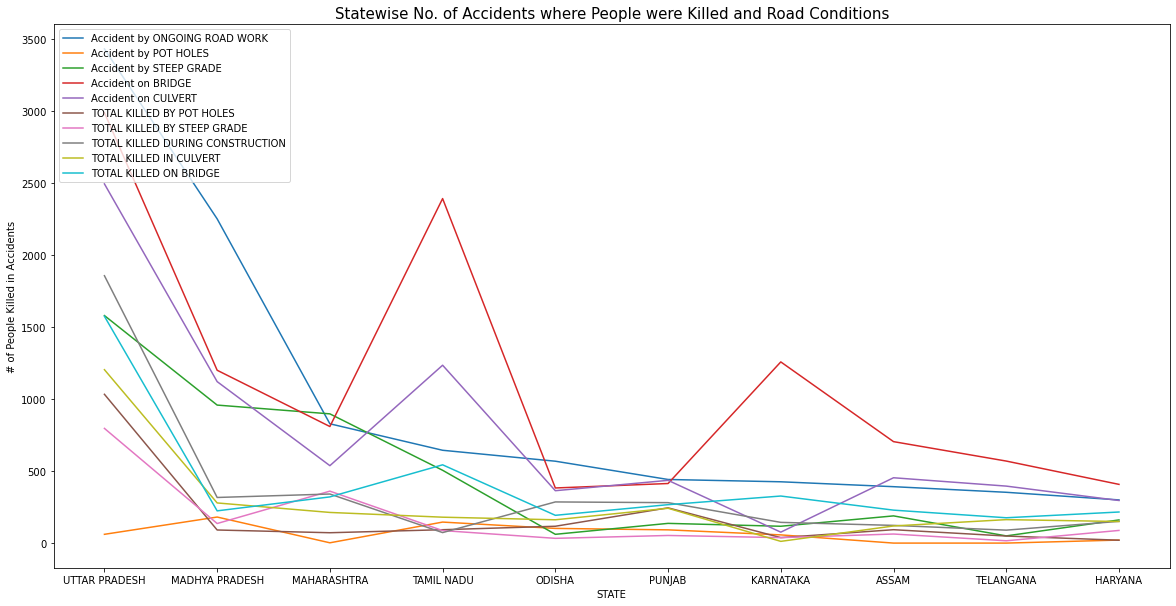

In [117]:
df =pd.pivot_table(dataset_1, index=['STATE'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(10)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['STATE'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')

# Statewise No. of Accidents where People were Killed and Road Conditions for last 15 states

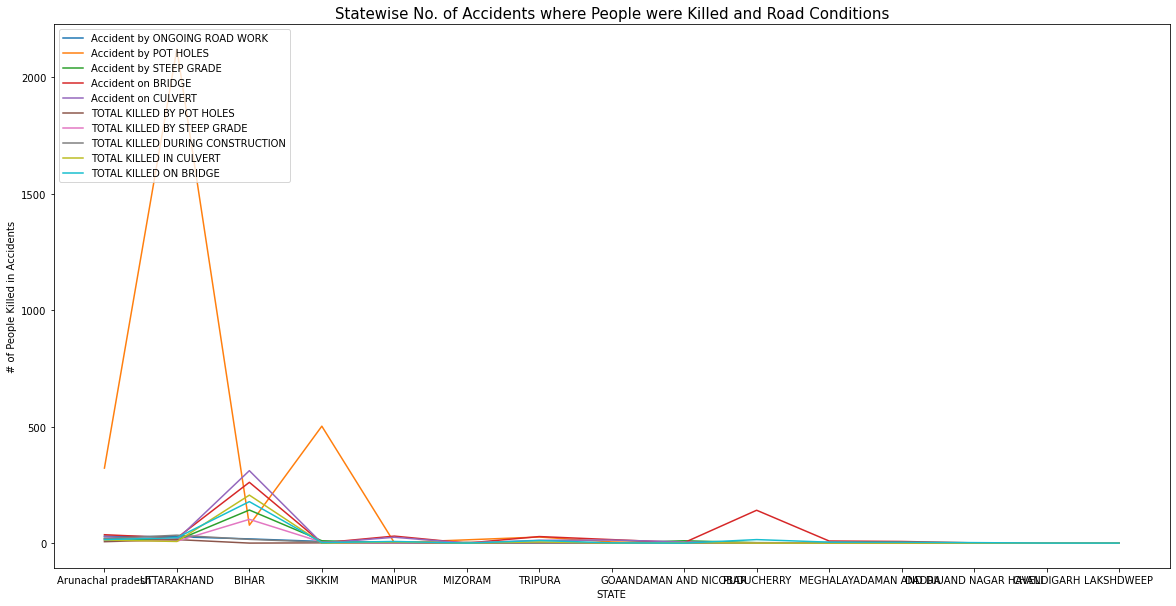

In [118]:
df =pd.pivot_table(dataset_1, index=['STATE'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).tail(15)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['STATE'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')

# Conclusion

Thus, we see how the data reflects the findings that have been published. It also cleared the common misconception that I had about weather and unruly/winding roads contributing to more no. of accidents. 

I'm going to end the kernel with this sweet link posted by the Govt which elaborates on the causes of road accidents. 
http://jhtransport.gov.in/causes-of-road-accidents.html


Drive safe everyone!!!